# Casualties data Preprocessing


### Process Flow :

1. load file from Internet and create pickle snapshot in case dataset site off-line 
2. save cleaned Caualties data for downstream use
3. reload preprocessed data and check details

### Input data

Casualties data: from https://data.gov.uk/dataset/road-accidents-safety-data  
**Casualties_FLM.csv**: from /Specs directory

### Output data

* 'Casualties_2015.pickle': snapshot of Casualties source data
* 'Casualties.pickle' : **Casualties dataset**
* saved data assessment plot (.png) snapshots

## Import external libraries

In [1]:
'''
RTA Casualties required imports
'''
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

## 'Import' RTAutilities

In [2]:
'''
Provide output of csv and pickle formats for DataFrames
'''
def pick_and_csv(df, path, filename):
    import sys
    try:
        df.to_csv(path + filename + '.csv', index=False)
        df.to_pickle(path + filename + '.pickle')
    except IOError as (errno, strerror):
        print ('I/O error({0}): {1}'.format(errno, strerror))
        if errno == 13:
            print ('*** check to see if (someone has) file already open ***')
        elif errno == 2:
            print ('Directory parameter needs to be a valid directory')
    except:
        print ("Unexpected error:", sys.exc_info()[0])
        print ('*** is first parameter a DataFrame? ***')
        raise

## Load Casuaties data and create dataset

In [3]:
'''
load all Casualties data and save snapshot
'''
start_time0 = time.time()

#load Casualties file from url
url = 'http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Casualties_2015.zip'
Casualties = pd.read_csv(url, compression='zip', sep=',', quotechar='"', engine = 'python')

#Save Casualties data as a csv and pickle file
_ = pick_and_csv(Casualties, 'Data/', 'Casualties_2015')

print ("Casualties dataload from website: %s seconds " % (time.time() - start_time0))

Casualties dataload from website: 26.3289999962 seconds 


In [4]:
start_time0 = time.time()

#load 'Field Load Map' specification
pfl = pd.read_csv('Specs/Casualties_FLM_2.csv', low_memory=False)
pc_cols_rename = dict(pfl[['field_name','field_descriptor']].where(pfl['import']=='Y').dropna().values.tolist())
pc_cols_drop = pfl['field_name'].where(pfl['import']=='N').dropna().values.tolist()

#clean data
Casualties.drop(pc_cols_drop, axis=1, inplace=True) # drop columns based on loaded 'FLM' spec
Casualties.rename(columns=pc_cols_rename, inplace=True) #rename columns to lower case and no spaces based on 'FLM' spec
Casualties.astype(np.int, inplace=True, errors='ignore') # make all fields int64 - exception is Accident index.

#save for later
_ = pick_and_csv(Casualties, 'Data/', 'Casualties')
    
print "Casualties dataset preparation: %s seconds " % (time.time() - start_time0)

Casualties dataset preparation: 4.24300003052 seconds 


## Data assessment

In [5]:
'''
Reload RTA Casualties dataframe
'''
#Casualties = pd.read_csv('Data/Casualties.csv')
Casualties = pd.read_pickle('Data/Casualties.pickle')

In [6]:
Casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186189 entries, 0 to 186188
Data columns (total 16 columns):
accident_index                        186189 non-null object
vehicle_reference                     186189 non-null int64
casualty_reference                    186189 non-null int64
casualty_class                        186189 non-null int64
sex_of_casualty                       186189 non-null int64
age_of_casualty                       186189 non-null int64
age_band_of_casualty                  186189 non-null int64
casualty_severity                     186189 non-null int64
pedestrian_location                   186189 non-null int64
pedestrian_movement                   186189 non-null int64
car_passenger                         186189 non-null int64
bus_or_coach_passenger                186189 non-null int64
pedestrian_road_maintenance_worker    186189 non-null int64
casualty_type                         186189 non-null int64
casualty_home_area_type               186189 non

In [7]:
Casualties.head(2)

,accident_index,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201597UA71710,2,1,1,2,75,10,3,0,0,0,0,0,9,3,-1
1,201597UA71810,2,1,2,2,63,9,2,0,0,0,4,0,11,3,-1


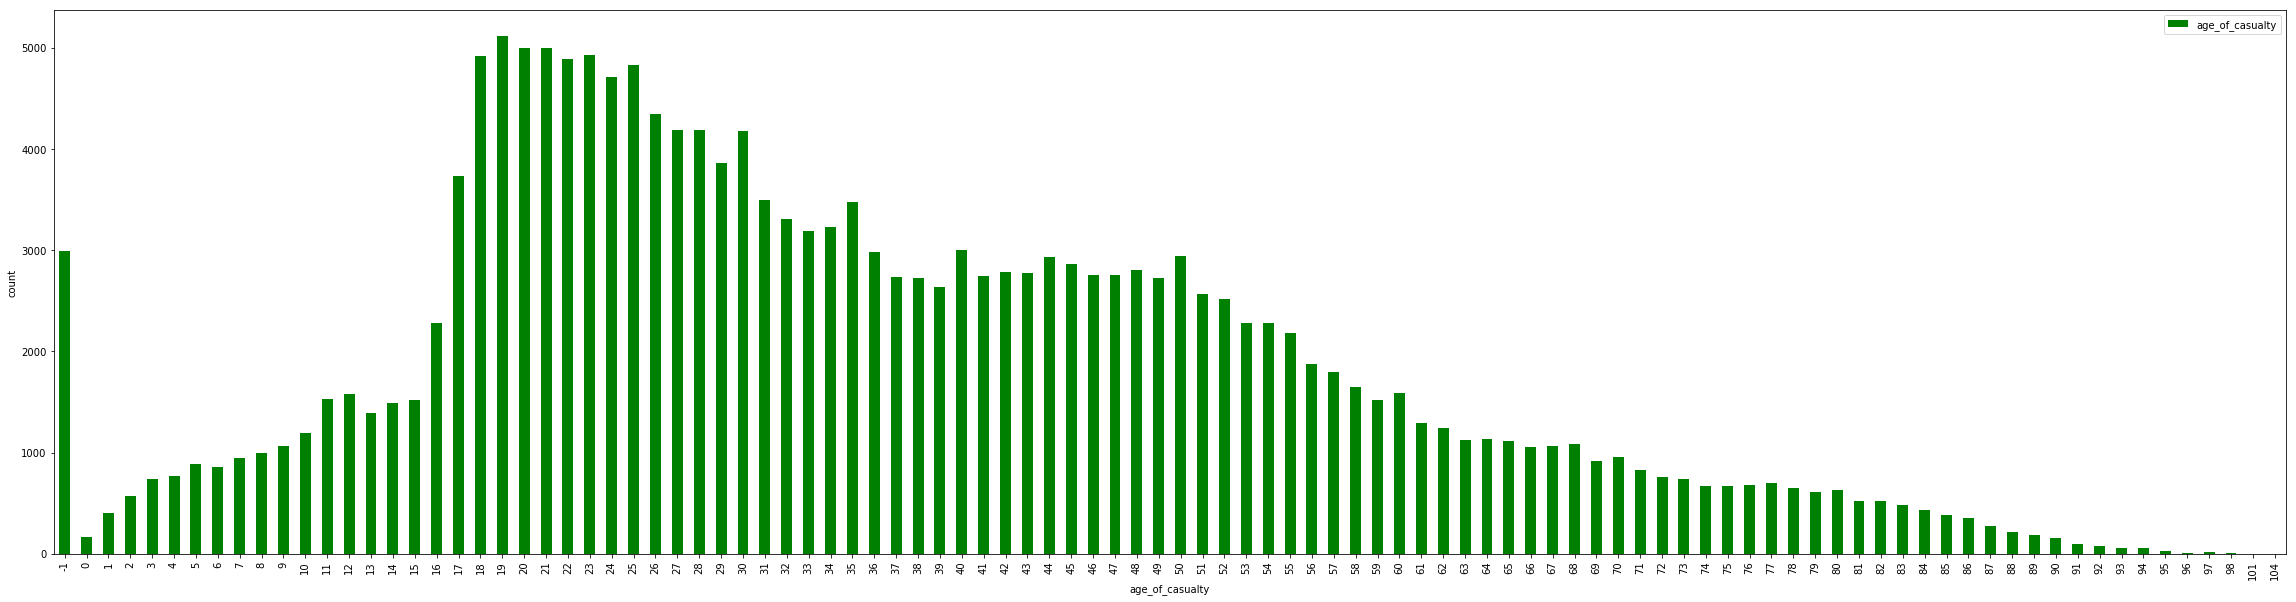

In [8]:
'''
RTA Casualties check data fields
'''
# check data
col = 'age_of_casualty'

plt.figure(figsize=(40,10))
Casualties.groupby([col])[col].count().plot(kind='bar', color='g',legend=True)
plt.ylabel('count')
plt.savefig('Data/Pics/Casualties_Bar_'+col+'.png')
plt.show()

#print(Casualties.groupby([col])[col].count())